In [1]:
import sys
import os.path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir)))

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

import dsp
from read_labels import read_labels

%matplotlib inline

In [3]:
rootdir = '/home/tracek/Data/Birdman/'
filename = os.path.join(rootdir, 'raw/STHELENA-02_20140605_200000_1.wav')
outdir = os.path.join(rootdir, 'raw/samples/')
sheets = read_labels('/home/tracek/Data/Birdman/labels/sthelena_labels.xls')
filename_noext = os.path.splitext(os.path.basename(filename))[0]
sheet = sheets[filename_noext]

# in seconds [s]
signal_start_s = 0
signal_end_s = 95

sr = 16000
win = 256 # samples
hop = win // 2

condition = (sheet['Time Start'] > signal_start_s) & (sheet['Time End'] < signal_end_s)
sheet_sample = sheet[condition]

/home/tracek/.virtualenvs/ml/lib/python3.5/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [26]:
y, sr = librosa.load(filename, sr=sr, dtype='float64')
y = y[signal_start_s * sr: signal_end_s * sr]
y = dsp.highpass_filter(y, sr, highcut=500, order=6)

In [39]:
pitches = dsp.get_pitch(y, sr, win, hop, tolerance=0.6)

In [40]:
def point_in_call(onset, calls_list, buffer=0):
    for index, call in calls_list.iterrows():
        if call['Time Start'] - buffer <= onset <= call['Time End'] + buffer:
            return call['Species']
    else:
        return None

def plot_specgram(signal, sr, nfft, hop, signal_start_s, signal_end_s, labels=None, points=None):
    x_spacing = np.linspace(signal_start_s, signal_end_s, len(signal))
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    if labels is not None:
        for index, row in labels.iterrows():
            if row['Species'] == 'Storm Petrel':
                ax.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='red', alpha=0.3)
            else:
                ax.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='green', alpha=0.2)
    if points:
        for point in points:
            ax.axvline(x=point, color='blue', alpha=0.3)
            if point_in_call(point, labels, buffer=0):
                plt.plot(point, 6000, 'ro')

    spec = plt.specgram(signal, Fs=sr, NFFT=nfft, noverlap=hop, xextent=(signal_start_s, signal_end_s))

In [41]:
pitches_mean = np.array([value for time, value in pitches]).mean()
f0 = [(time, value) for time, value in pitches if value > pitches_mean]
pitch_time = [time for time, value in pitches if value > pitches_mean]

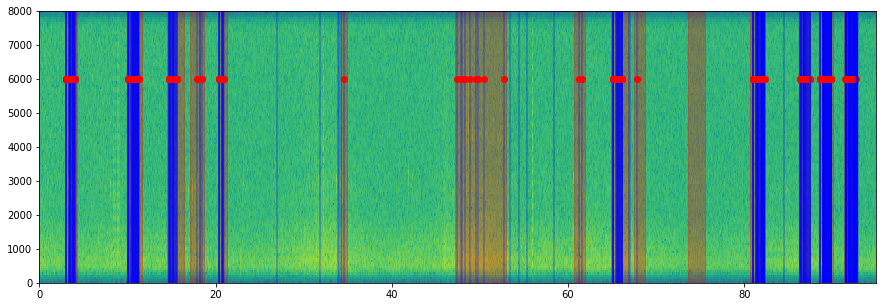

In [42]:
plot_specgram(y, sr, win, hop, signal_start_s, signal_end_s, labels=sheet_sample, points=pitch_time)

In [9]:
f0

[(3.048, 1458.4331),
 (3.056, 1592.8971),
 (3.064, 1645.5054),
 (3.072, 1623.5642),
 (3.08, 3355.321),
 (3.696, 1320.4789),
 (3.704, 3978.3997),
 (3.712, 1228.3342),
 (3.72, 3400.1018),
 (10.096, 3519.6697),
 (10.104, 3644.7068),
 (10.12, 3567.7371),
 (10.384, 3106.8735),
 (10.504, 3215.3259),
 (10.512, 3153.2273),
 (10.576, 3275.5364),
 (10.584, 3392.198),
 (10.592, 3378.7148),
 (10.6, 3217.5144),
 (10.792, 1461.0825),
 (10.84, 1418.7728),
 (10.848, 3100.5923),
 (10.856, 1492.2941),
 (10.984, 1371.8989),
 (10.992, 4017.5439),
 (11.0, 3971.7114),
 (11.008, 3323.7),
 (11.016, 3441.9939),
 (11.024, 3494.1719),
 (11.2, 1232.9342),
 (20.432, 1542.2231),
 (20.44, 3245.697),
 (20.448, 3242.1145),
 (20.456, 3170.0576),
 (65.096, 2787.5547),
 (65.104, 2783.2163),
 (65.112, 2730.1367),
 (65.12, 2689.832),
 (65.448, 2748.8591),
 (65.456, 2773.0581),
 (65.464, 2815.9802),
 (65.68, 2666.7639),
 (65.688, 2693.8977),
 (65.696, 2709.99),
 (65.744, 2805.2708),
 (65.752, 2693.6655),
 (65.76, 2409.6018)

In [ ]:
len(y) / sr